In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling
import warnings
warnings.filterwarnings("ignore",category = DeprecationWarning)
pd.set_option("display.max_colwidth",200)

In [2]:
df = pd.read_csv("datasets_596958_1073629_Placement_Data_Full_Class.csv")

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# removing sl_no
df.drop("sl_no",axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [6]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## Exploring data by each features

### gender - Does gender affect Placements

In [7]:
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

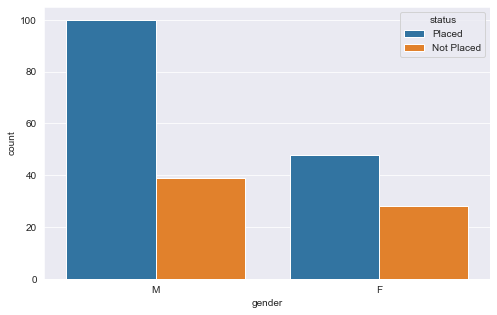

In [8]:
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.countplot('gender',data=df,hue='status')

Text(0.5, 0, 'Salary (100k)')

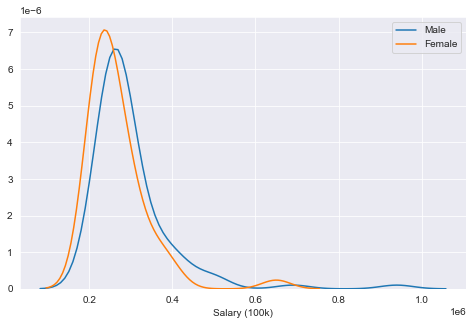

In [9]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['gender']=='M']['salary'])
sns.kdeplot(df[df['gender']=='F']['salary'])
plt.legend(['Male','Female'])
plt.xlabel("Salary (100k)")

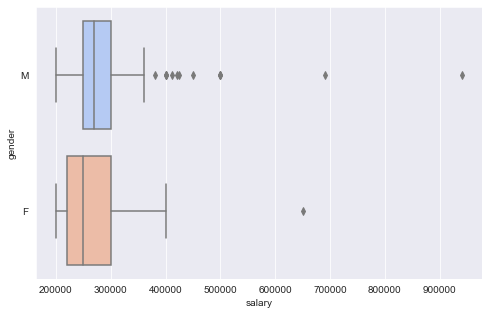

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='salary',y='gender',data=df,palette='coolwarm')

In [11]:
df[df['status']=='Not Placed']['gender'].value_counts()

M    39
F    28
Name: gender, dtype: int64

**Insights**

1. We have samples of 139 Male studets and 76 Female students.
2. 28 Female and 39 Male students are not placed. Male students have comparatively higher placemets.
3. More outliers on Male -> Male students are getting high CTC jobs.
4. Male students are offered slightly greater salary than female on an average.

## Feature : ssc_p and ssc_b

Does feature ssc_b affect placements

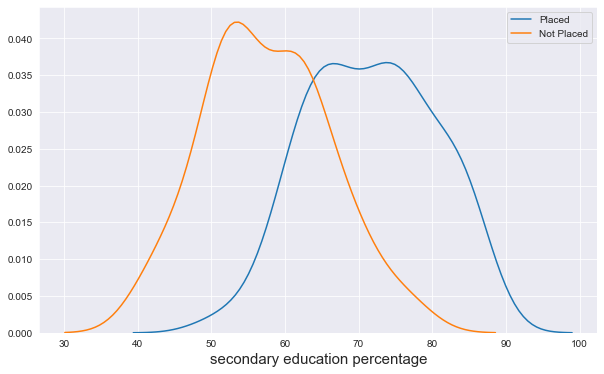

In [12]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['status']=='Placed']['ssc_p'])
sns.kdeplot(df[df['status']=='Not Placed']['ssc_p'])
plt.legend(['Placed','Not Placed'])
plt.xlabel('secondary education percentage',fontsize=15)
plt.show()

Text(0, 0.5, 'status')

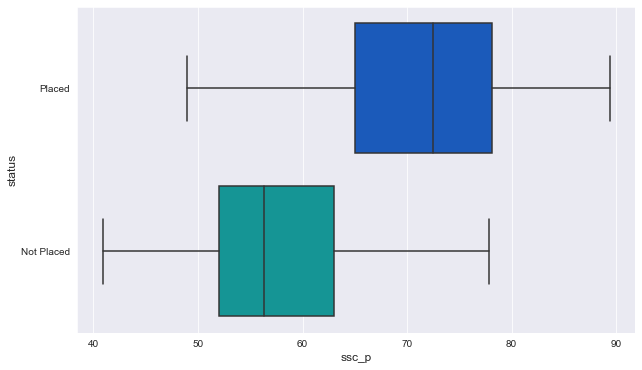

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'ssc_p', y = 'status', data = df, palette='winter')
plt.xlabel('ssc_p',fontsize=12)
plt.ylabel('status',fontsize=12)

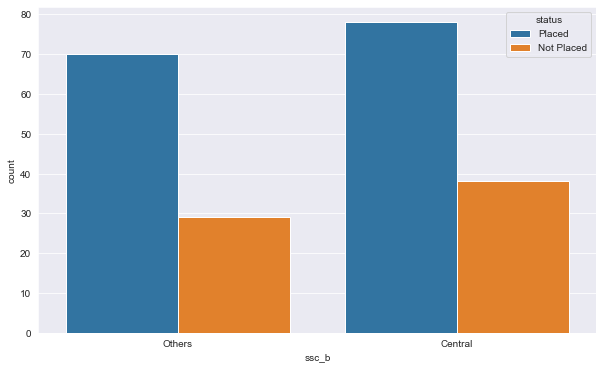

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='ssc_b',hue='status',data=df)

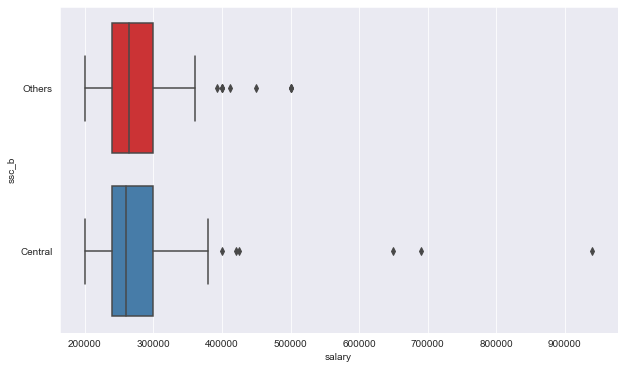

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'salary', y = 'ssc_b', data=df, palette='Set1')

In [16]:
df.groupby('ssc_b')['salary'].median()

ssc_b
Central    260000.0
Others     265000.0
Name: salary, dtype: float64

In [17]:
df.groupby('ssc_b')['salary'].max()

ssc_b
Central    940000.0
Others     500000.0
Name: salary, dtype: float64

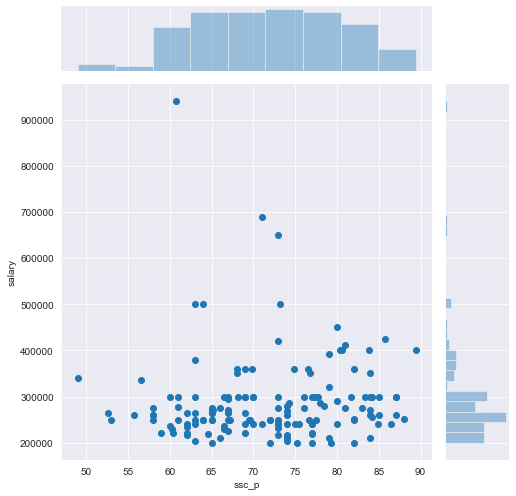

In [18]:
sns.jointplot(x = 'ssc_p', y = 'salary', data=df, height=7)

**Insights**

1. The board of education does not affect placements much.
2. There is no strong correlation between secondary education percentage and salary.
3. The Central board student has a highest package of 9.4 lakhs per annum.
4. The other board student has a highest package of 5 lakhs per annum

### Feature : hsc_p(Higher secondary education percentage), hsc_b(board of education), hsc_s (stream chosen)


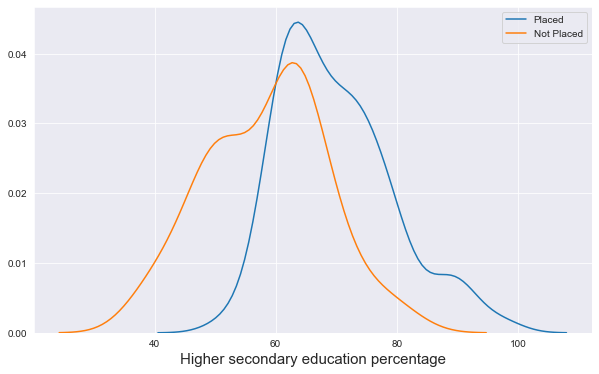

In [19]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['status']=='Placed']['hsc_p'])
sns.kdeplot(df[df['status']=='Not Placed']['hsc_p'])
plt.legend(['Placed','Not Placed'])
plt.xlabel('Higher secondary education percentage',fontsize=15)
plt.show()

In [20]:
df['hsc_p'].min()

37.0

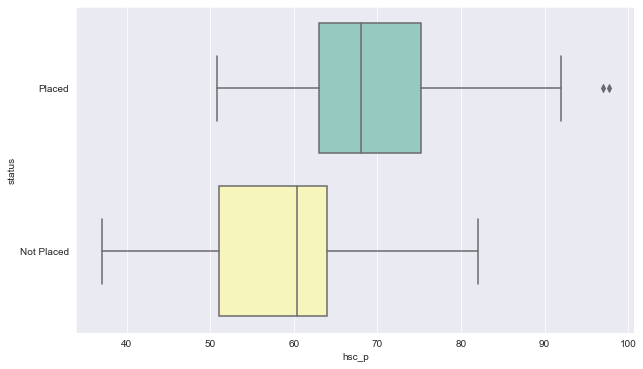

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'hsc_p', y='status', data=df, palette='Set3')

<ul>
    <li>Overlap here too. More placements for percentage above 65%</li>
    <li>Straight drop below 60% in placements -> Percentage must be above 60 for the chance of being placed</li>
</ul>

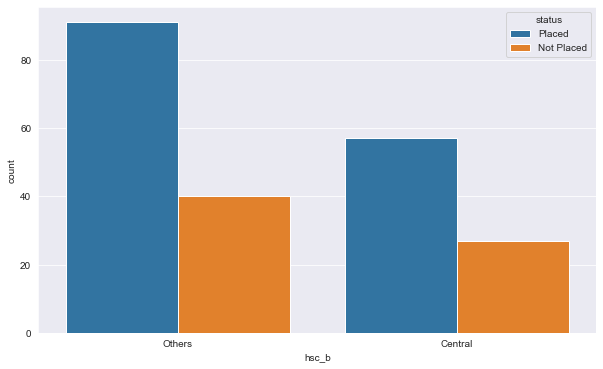

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'hsc_b', hue = 'status', data=df)

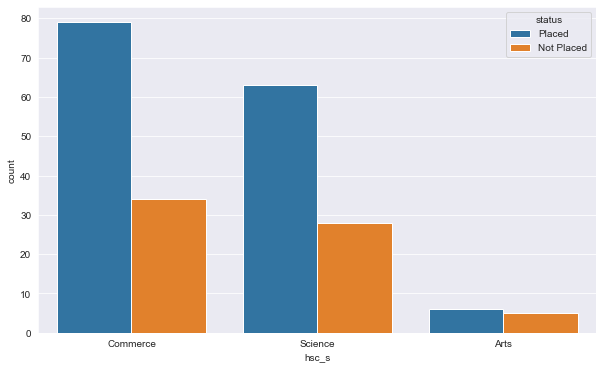

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'hsc_s', hue = 'status', data=df)

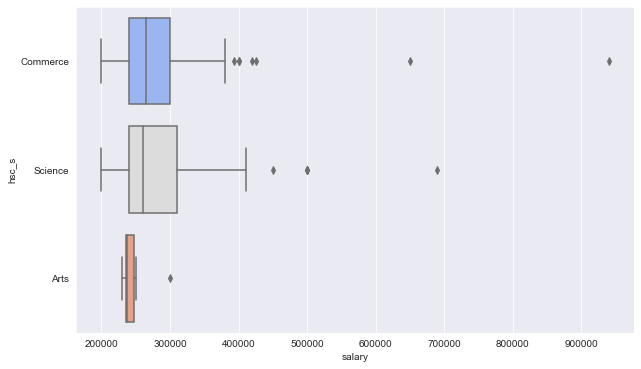

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'salary', y = 'hsc_s', data=df, palette='coolwarm')

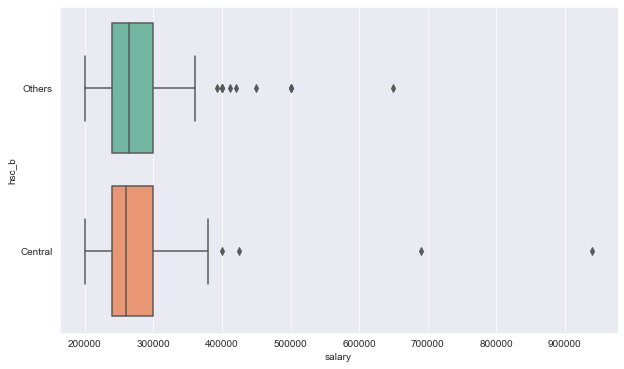

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'salary', y = 'hsc_b', data=df, palette='Set2')

In [26]:
df.groupby('hsc_s')['salary'].median()

hsc_s
Arts        238000.0
Commerce    265000.0
Science     260000.0
Name: salary, dtype: float64

In [27]:
df.groupby('hsc_s')['salary'].max()

hsc_s
Arts        300000.0
Commerce    940000.0
Science     690000.0
Name: salary, dtype: float64

In [28]:
df.groupby('hsc_s')['salary'].mean()

hsc_s
Arts        248666.666667
Commerce    287417.721519
Science     294015.873016
Name: salary, dtype: float64

**Insights**
<ul>
    <li>High salary from both Central and Other.</li>
    <li>High salary for both high and low percentage.</li>
    <li>Thus, both these feature doesnot affect salary.</li>
    <li> The commerce and science stream students are getting more placements than the Arts stream students but the sample size for Arts students are less.</li>
</ul>

### Features : degree_p and degree_t(undergraduate specialisation)

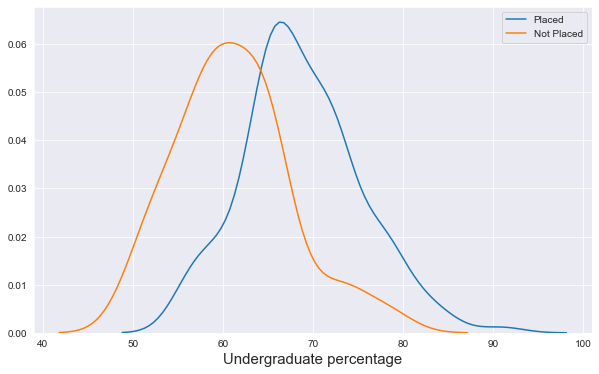

In [29]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['status']=='Placed']['degree_p'])
sns.kdeplot(df[df['status']=='Not Placed']['degree_p'])
plt.legend(['Placed','Not Placed'])
plt.xlabel('Undergraduate percentage',fontsize=15)
plt.show()

<ul>
    <li> High overlap here too. Students have percentage above 65 are getting more placements</li>
    <li> UG percentage at least 50 to get palcement</li>
</ul>

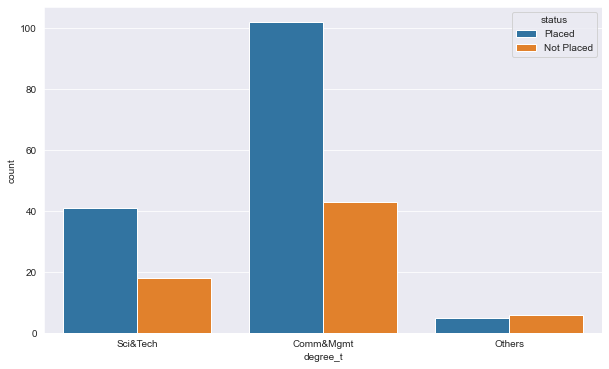

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'degree_t', hue = 'status', data=df)

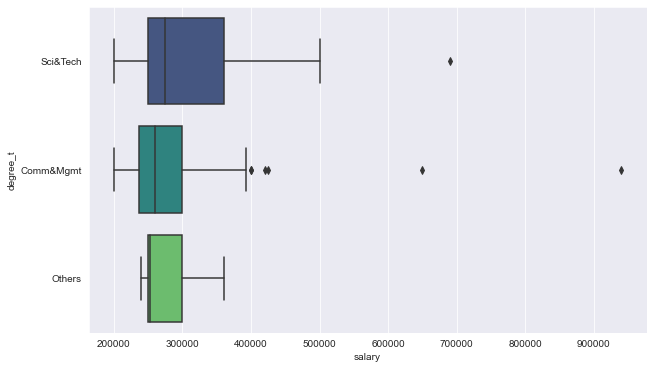

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'salary', y = 'degree_t', data=df, palette='viridis')

In [32]:
df.groupby('degree_t')['salary'].median()

degree_t
Comm&Mgmt    260000.0
Others       252000.0
Sci&Tech     275000.0
Name: salary, dtype: float64

In [33]:
df.groupby('degree_t')['degree_p'].mean()

degree_t
Comm&Mgmt    66.203103
Others       60.666364
Sci&Tech     67.844237
Name: degree_p, dtype: float64

<ul>
    <li>Science & Tech students getting more salary on average</li>
    <li>Management stidents are getting more highly paid dream jobs</li>
</ul>

### Feature : workex(work experience)

Does work experience affect placement

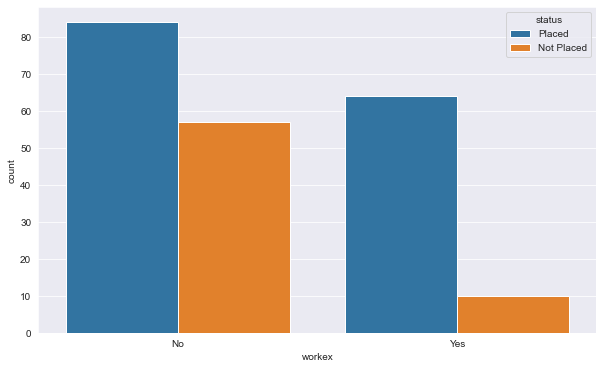

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(df['workex'], hue=df['status'])

 Yes, work experience affects placements. Very few Students  with work experience are not getting placed

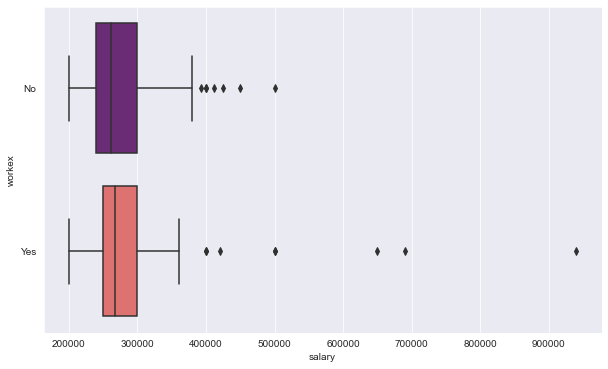

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='salary', y='workex',data=df,palette='magma')

Outliers on both but the students with work experience are getting dream jobs

### Feature : Specialisation(Post Graduate) and MBA_p(mba percentage)

Does these features affect placements

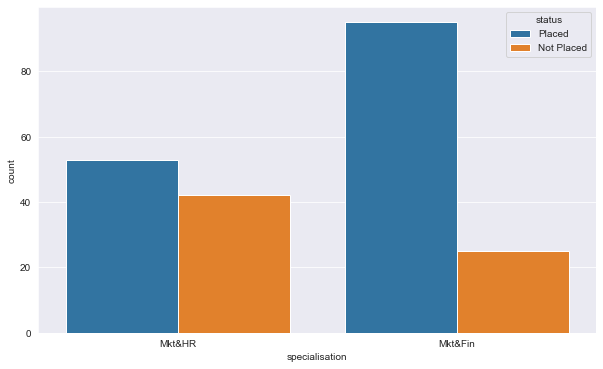

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'specialisation', hue='status', data=df)

The Mkt&Fin students are getting more placements. Very less students ot getting placed

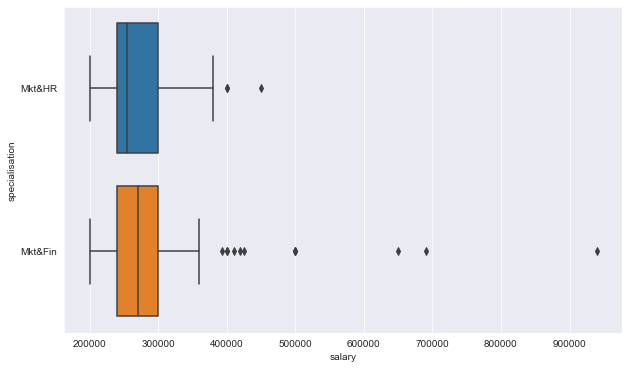

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='salary',y='specialisation', data=df)

Mkt&Fin students are getting high paid jobs

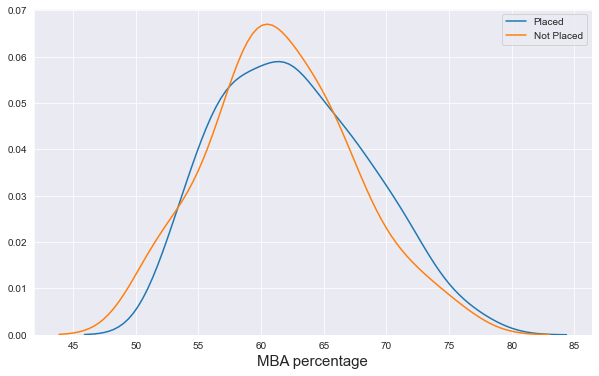

In [38]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['status']=='Placed']['mba_p'])
sns.kdeplot(df[df['status']=='Not Placed']['mba_p'])
plt.legend(['Placed','Not Placed'])
plt.xlabel('MBA percentage',fontsize=15)
plt.show()

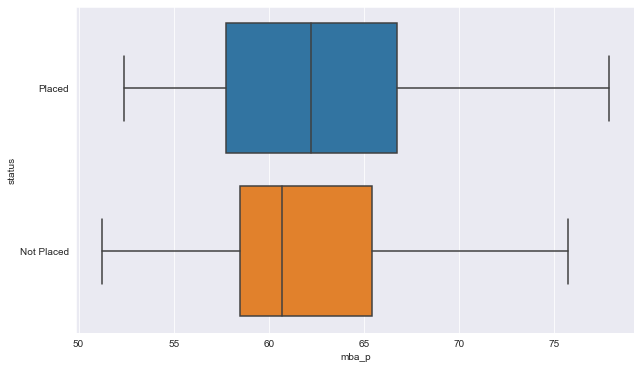

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='mba_p',y='status',data=df)

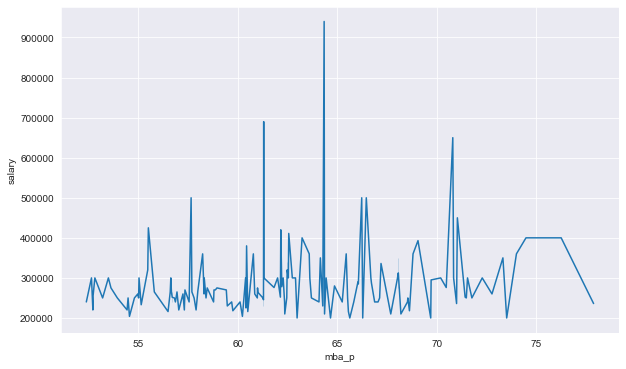

In [40]:
plt.figure(figsize=(10,6))
sns.lineplot(x='mba_p', y='salary', data=df)

The MBA percentage does not affect placement and salary much

### Selecting Features

dropping board of education as it does'nt seem to affect placement much

In [41]:
df.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

In [42]:
df['status'] = df['status'].map({'Placed':1, 'Not Placed':0})

In [43]:
df.dtypes

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status              int64
salary            float64
dtype: object

In [44]:
dummies = pd.get_dummies(df[['gender','hsc_s','degree_t','workex','specialisation']], drop_first=True)

In [45]:
df = df.drop(['gender','hsc_s','degree_t','workex','specialisation'],axis=1)

In [46]:
df = pd.concat([df,dummies],axis=1)

In [47]:
X = df.drop(['status','salary'],axis=1).values
y = df['status'].values

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [93]:
# using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
pred = dtree.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [96]:
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[12  7]
 [ 6 29]]

              precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.81      0.83      0.82        35

    accuracy                           0.76        54
   macro avg       0.74      0.73      0.73        54
weighted avg       0.76      0.76      0.76        54



In [97]:
#Using Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [98]:
print(confusion_matrix(y_test,y_pred))

[[12  7]
 [ 2 33]]


In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        19
           1       0.82      0.94      0.88        35

    accuracy                           0.83        54
   macro avg       0.84      0.79      0.80        54
weighted avg       0.84      0.83      0.83        54



### Binary Classification with Logistic Regression¶

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)
l_pred = lreg.predict(X_test)

In [102]:
print(classification_report(y_test, l_pred))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.83      0.97      0.89        35

    accuracy                           0.85        54
   macro avg       0.88      0.80      0.82        54
weighted avg       0.86      0.85      0.84        54



In [103]:
print(confusion_matrix(y_test,l_pred))

[[12  7]
 [ 1 34]]
